<a href="https://colab.research.google.com/github/GusdPaula/ML_interview/blob/main/torch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# importi libraries
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Downloading the data

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# Choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

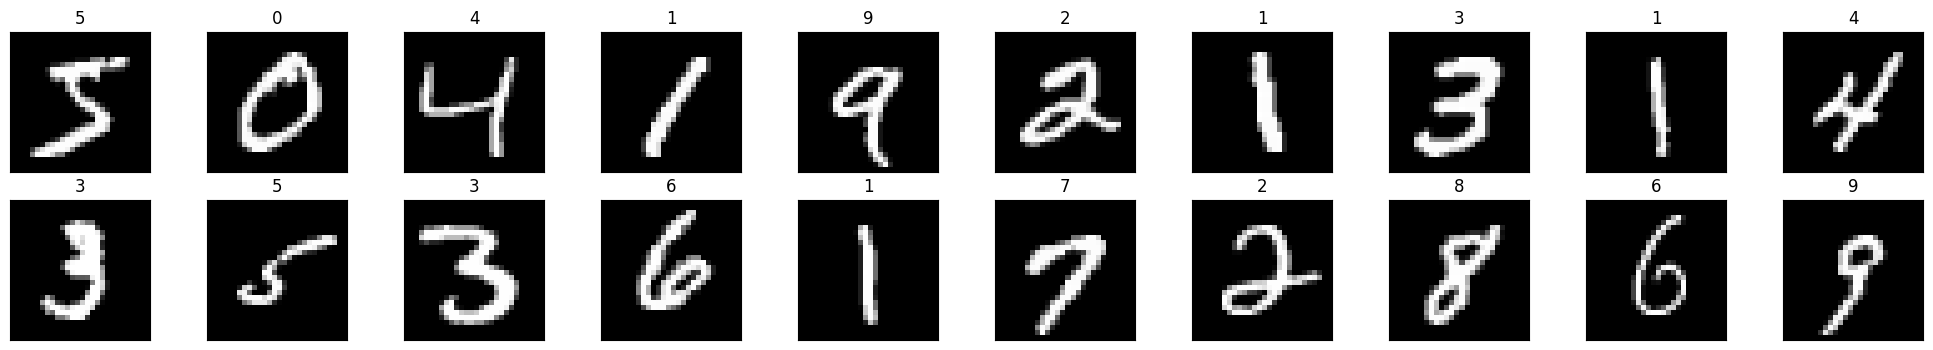

In [28]:
# Vizualize a Batch of Training Data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

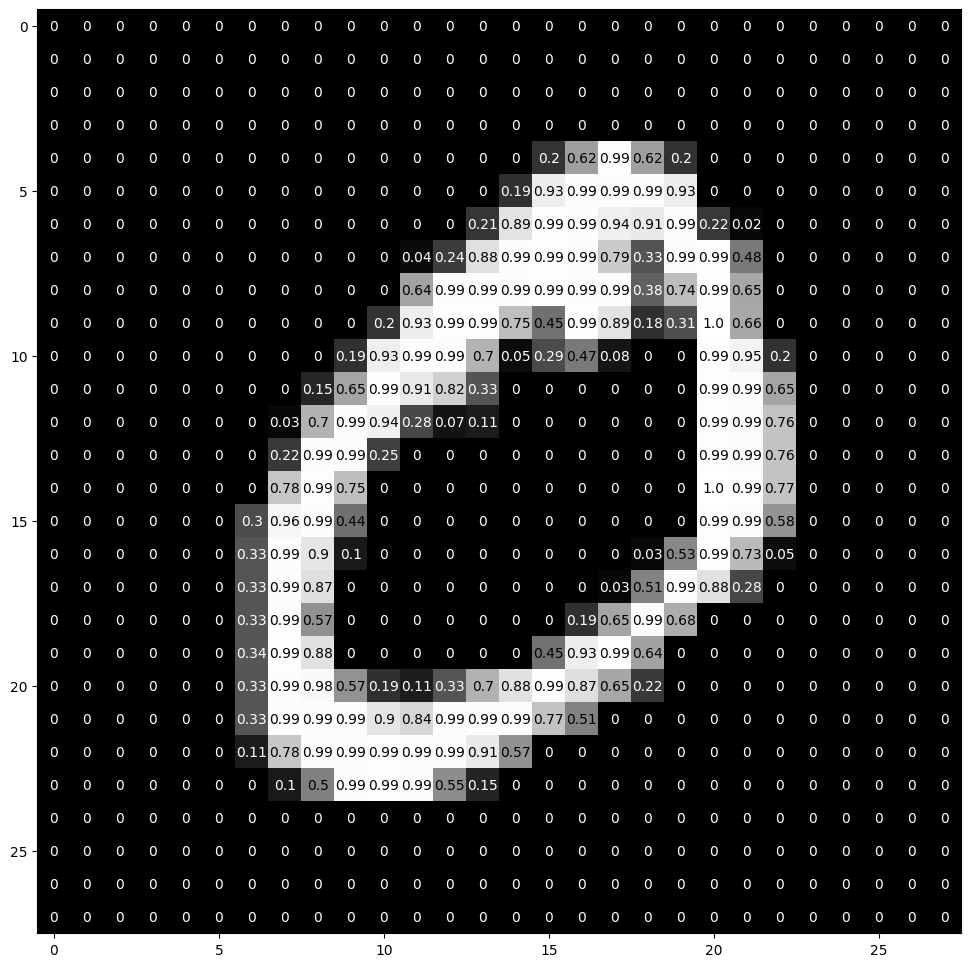

In [29]:
# view image in more detail

img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [31]:
# Define the Network Archtecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

        self.droput = nn.Dropout(0.2)


    def forward(self, x):
      x= x.view(-1, 28 * 28)
      x = F.relu(self.fc1(x))

      return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


In [32]:
# Specify Loss Function and Optimizer

# Specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [33]:
# Train the network

n_epochs = 30

model.train() # prep model for training

for epoch in range(n_epochs):
  # monitor training loss
  train_loss = 0.0

  for data, target in train_loader:
    # clear the gradients of all optimized variables
    optimizer.zero_grad()

    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)

    # calculate the loss
    loss = criterion(output, target)

    # backward pass: compute gradient of the loss with respect to the model parameters
    loss.backward()

    # perform a single optimization step (parameter update)
    optimizer.step()

    # update running training loss
    train_loss += loss.item()

  # calculate avarege loss over an epoch
  train_loss = train_loss/len(train_loader.dataset)

  print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 0.136661
Epoch: 2 	Training Loss: 0.048089
Epoch: 3 	Training Loss: 0.036492
Epoch: 4 	Training Loss: 0.031547
Epoch: 5 	Training Loss: 0.028682
Epoch: 6 	Training Loss: 0.026772
Epoch: 7 	Training Loss: 0.025387
Epoch: 8 	Training Loss: 0.024327
Epoch: 9 	Training Loss: 0.023482
Epoch: 10 	Training Loss: 0.022789
Epoch: 11 	Training Loss: 0.022208
Epoch: 12 	Training Loss: 0.021711
Epoch: 13 	Training Loss: 0.021280
Epoch: 14 	Training Loss: 0.020901
Epoch: 15 	Training Loss: 0.020565
Epoch: 16 	Training Loss: 0.020264
Epoch: 17 	Training Loss: 0.019993
Epoch: 18 	Training Loss: 0.019746
Epoch: 19 	Training Loss: 0.019521
Epoch: 20 	Training Loss: 0.019314
Epoch: 21 	Training Loss: 0.019122
Epoch: 22 	Training Loss: 0.018945
Epoch: 23 	Training Loss: 0.018781
Epoch: 24 	Training Loss: 0.018627
Epoch: 25 	Training Loss: 0.018483
Epoch: 26 	Training Loss: 0.018348
Epoch: 27 	Training Loss: 0.018220
Epoch: 28 	Training Loss: 0.018100
Epoch: 29 	Training Loss: 0.0

In [36]:
# test the model

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)

    # caculate the loss
    loss = criterion(output, target)

    # update test loss
    test_loss += loss.item()*data.size(0)

    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)

    # compare predictions to the true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
        str(i), 100 * class_correct[i] / class_total[i],
        np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.339963

Test Accuracy of     0: 97% (959/980)
Test Accuracy of     1: 97% (1101/1135)
Test Accuracy of     2: 86% (892/1032)
Test Accuracy of     3: 89% (908/1010)
Test Accuracy of     4: 92% (909/982)
Test Accuracy of     5: 84% (751/892)
Test Accuracy of     6: 93% (898/958)
Test Accuracy of     7: 90% (928/1028)
Test Accuracy of     8: 87% (853/974)
Test Accuracy of     9: 88% (891/1009)

Test Accuracy (Overall): 90% (9090/10000)


<Figure size 2500x400 with 0 Axes>

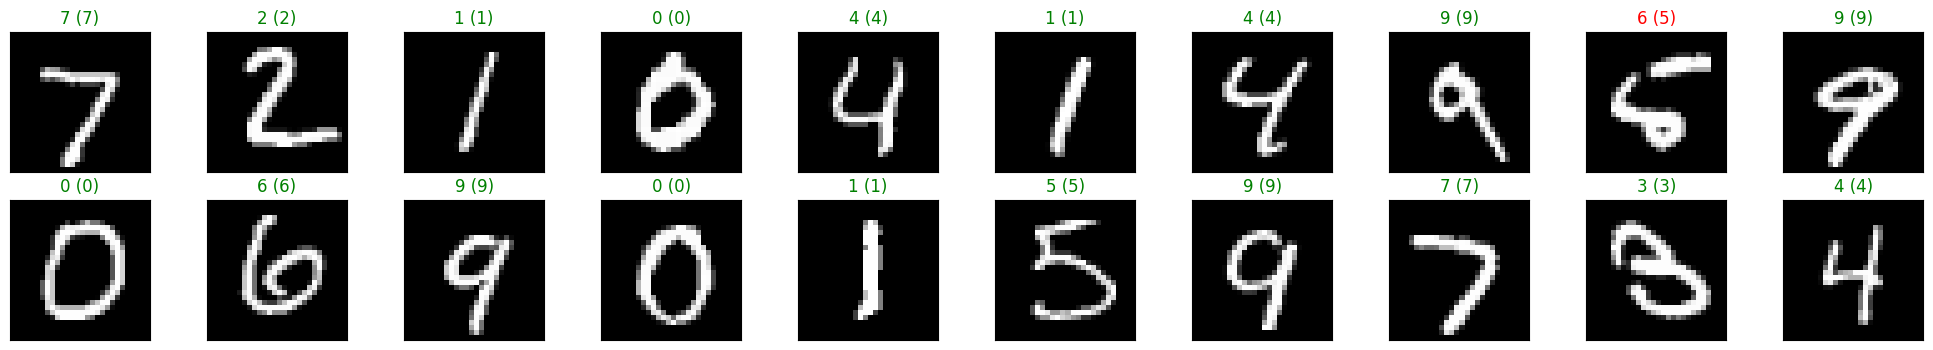

In [42]:
# Visualize Sample test Results

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)

# get sample outputs
output = model(images)

# convert output probabilities to predicted class
_, preds = torch.max(output, 1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))

# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))